In [26]:
!pip install yfinance numpy pandas matplotlib seaborn statsmodels scikit-learn


[*********************100%***********************]  1 of 1 completed


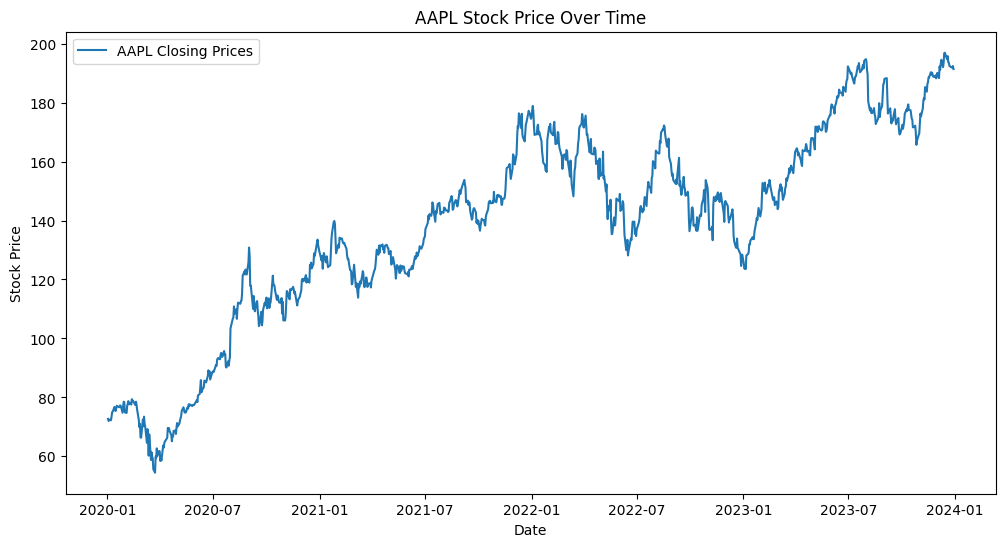


Augmented Dickey-Fuller Test:
ADF Statistic: -1.5119507483489638
p-value: 0.5275914088686263
The series is NOT stationary.
Naïve RMSE: 2.6019
Moving Average RMSE: 4.1956
Simple Exponential Smoothing RMSE: 4.1433
Holt’s Linear Trend RMSE: 2.7378
ARIMA RMSE: 2.5992


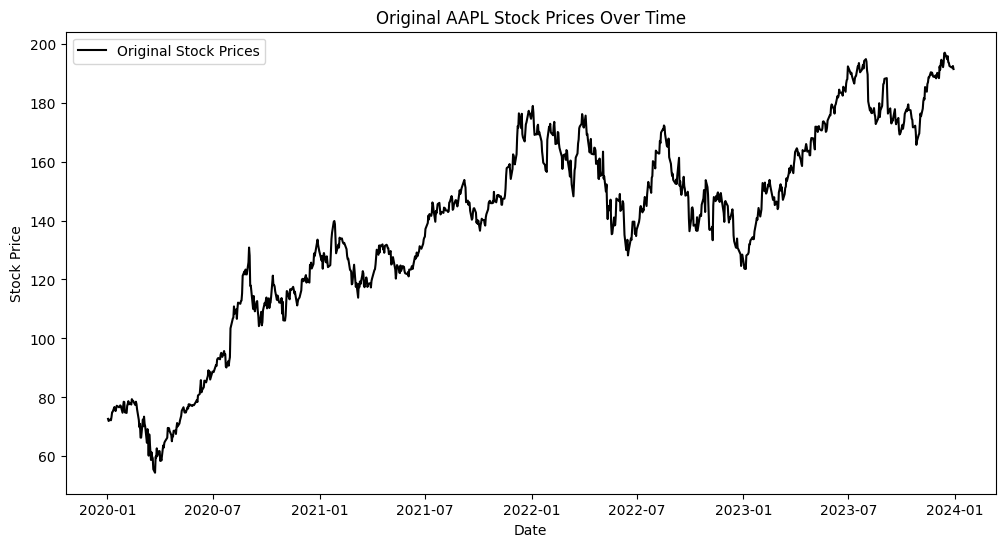

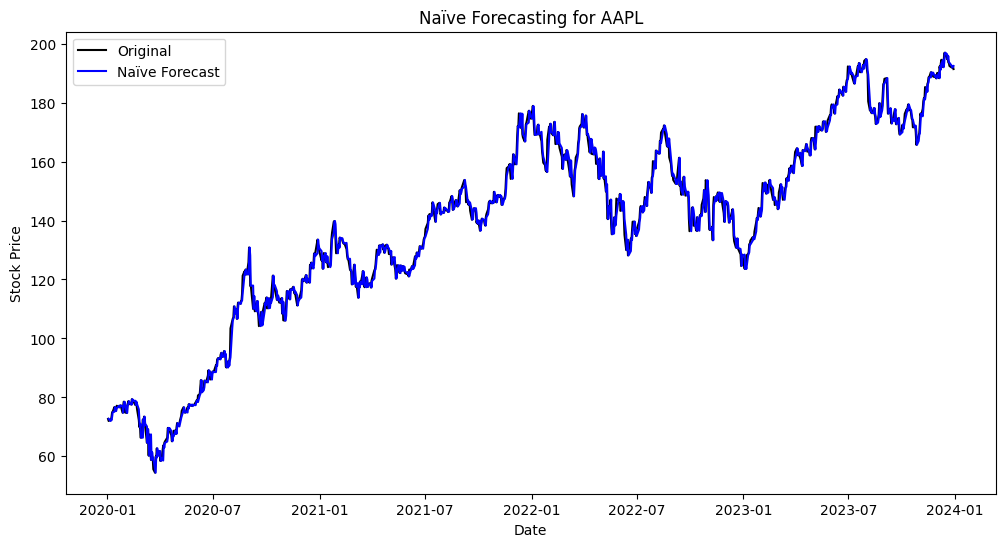

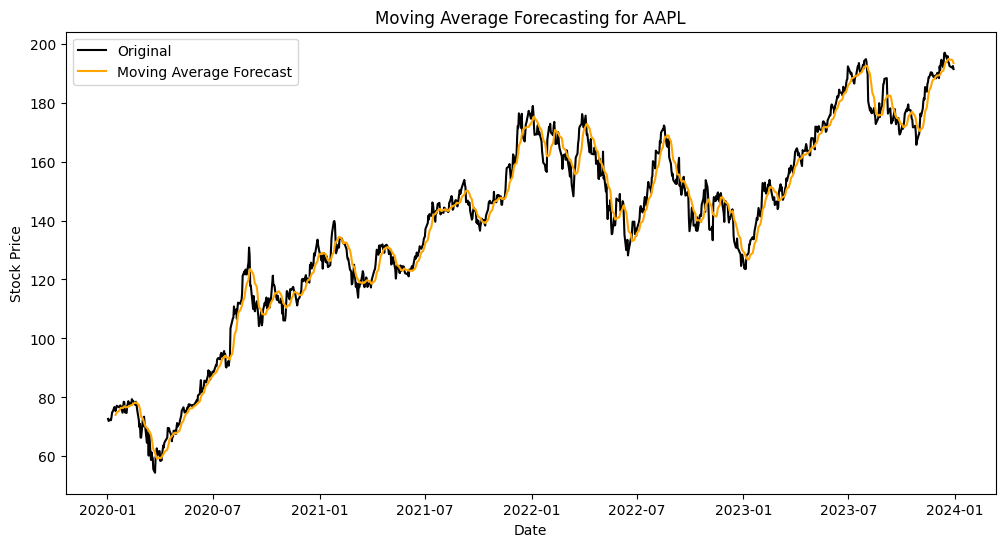

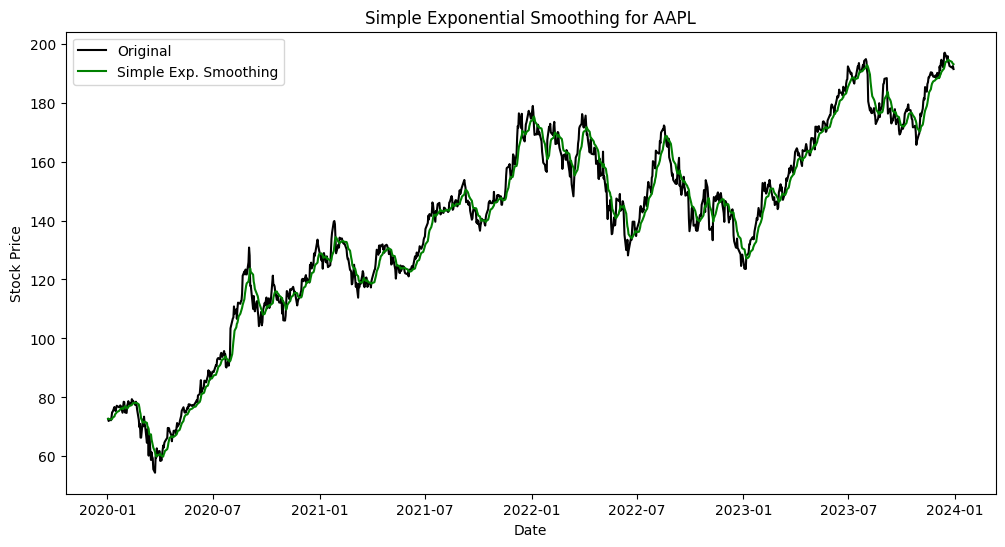

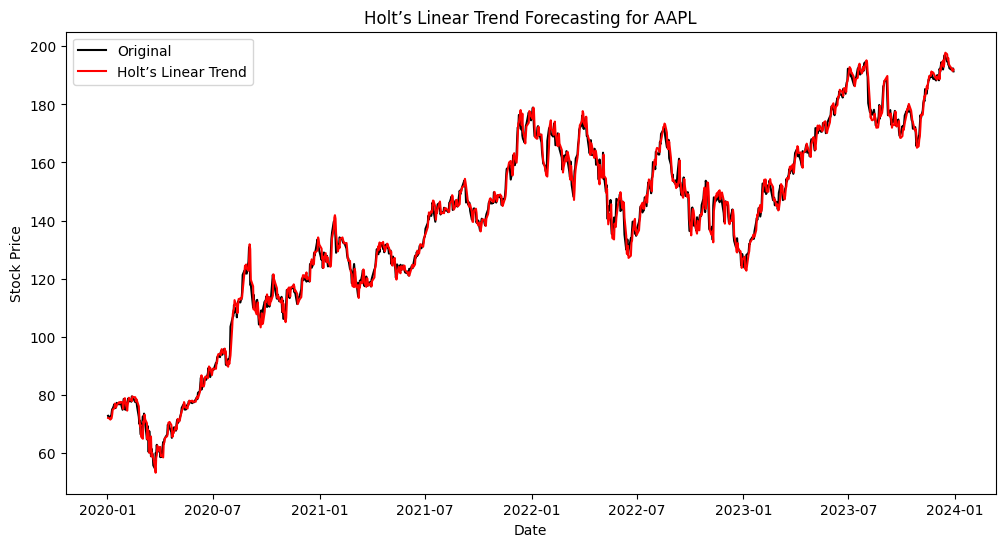

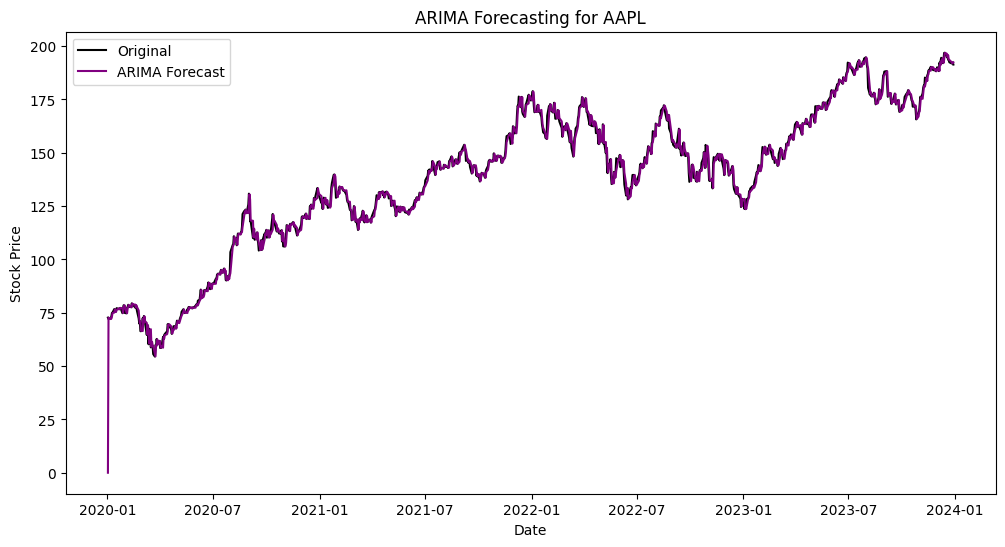


Model Performance Comparison:
                          Model      RMSE
0                         Naïve  2.601887
1                Moving Average  4.195622
2  Simple Exponential Smoothing  4.143332
3           Holt’s Linear Trend  2.737787
4                         ARIMA  2.599180


In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing

# Fetch Data from Yahoo Finance
ticker = "AAPL"  # Change to any stock symbol you want
start_date = "2020-01-01"
end_date = "2024-01-01"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]  # Use only the closing price

# Visualizing the Stock Price Data
plt.figure(figsize=(12, 6))
plt.plot(data, label=f'{ticker} Closing Prices')
plt.title(f'{ticker} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

print("\nAugmented Dickey-Fuller Test:")
adf_test(data['Close'])

# Naïve Approach
data['Naive'] = data['Close'].shift(1)
naive_rmse = sqrt(mean_squared_error(data['Close'][1:], data['Naive'][1:]))
print(f'Naïve RMSE: {naive_rmse:.4f}')

# Moving Average
window_size = 10  # Change window size as needed
data['Moving_Avg'] = data['Close'].rolling(window=window_size).mean()
moving_avg_rmse = sqrt(mean_squared_error(data['Close'][window_size:], data['Moving_Avg'][window_size:]))
print(f'Moving Average RMSE: {moving_avg_rmse:.4f}')

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(data['Close']).fit(smoothing_level=0.2, optimized=False)
data['SES'] = ses_model.fittedvalues
ses_rmse = sqrt(mean_squared_error(data['Close'], data['SES']))
print(f'Simple Exponential Smoothing RMSE: {ses_rmse:.4f}')

# Holt’s Linear Trend Model
holt_model = Holt(data['Close']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
data['Holt_Linear'] = holt_model.fittedvalues
holt_rmse = sqrt(mean_squared_error(data['Close'], data['Holt_Linear']))
print(f'Holt’s Linear Trend RMSE: {holt_rmse:.4f}')

# ARIMA Model
arima_model = ARIMA(data['Close'], order=(1, 1, 1))
arima_fit = arima_model.fit()
data['ARIMA'] = arima_fit.fittedvalues
arima_rmse = sqrt(mean_squared_error(data['Close'][1:], data['ARIMA'][1:]))
print(f'ARIMA RMSE: {arima_rmse:.4f}')

# Plot Original Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Stock Prices', color='black')
plt.title(f'Original {ticker} Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Naïve Forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original', color='black')
plt.plot(data['Naive'], label='Naïve Forecast', color='blue')
plt.title(f'Naïve Forecasting for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Moving Average Forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original', color='black')
plt.plot(data['Moving_Avg'], label='Moving Average Forecast', color='orange')
plt.title(f'Moving Average Forecasting for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Simple Exponential Smoothing Forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original', color='black')
plt.plot(data['SES'], label='Simple Exp. Smoothing', color='green')
plt.title(f'Simple Exponential Smoothing for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Holt’s Linear Trend Forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original', color='black')
plt.plot(data['Holt_Linear'], label='Holt’s Linear Trend', color='red')
plt.title(f'Holt’s Linear Trend Forecasting for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot ARIMA Forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original', color='black')
plt.plot(data['ARIMA'], label='ARIMA Forecast', color='purple')
plt.title(f'ARIMA Forecasting for {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# RMSE Comparison
rmse_values = {
    'Naïve': naive_rmse,
    'Moving Average': moving_avg_rmse,
    'Simple Exponential Smoothing': ses_rmse,
    'Holt’s Linear Trend': holt_rmse,
    'ARIMA': arima_rmse
}

rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])
print("\nModel Performance Comparison:")
print(rmse_df)
